# Has Fandango removed bias from their ratings?

After it was revealed in 2015 that Fandango's rating system was rounding ratings up considerably, the website stated their was a bug in their system causing the errors to occur. A journalist named Walt Hickey discovered that the actual rating displayed in a movie's HTML page did not always correspond to the rating displayed on Fandango. For example a 4.1 star rating would be rounded up to 4.5 stars. 

In this project I will examine more recent data from Fandango to find out whether the rounding error has continued to occur, or if Fandango has since fixed the issue. I will compare two datasets - one from before the bug was discovered and one from after it was discovered.

This is a guided project I completed through DataQuest.


First I will import necessary packages and read in the data:

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

warnings.filterwarnings('ignore')

before=pd.read_csv('fandango_score_comparison.csv')
after=pd.read_csv('movie_ratings_16_17.csv')

Next I will filter the data to columns relevant to my analysis:

In [260]:
before_filtered=before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after_filtered=after[['movie', 'year', 'fandango']]

Taking a look at the dataset:

In [261]:
before_filtered.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [262]:
after_filtered.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


I will check to confirm that the first dataset only contains movies from up to 2015, and the second dataset only contains movies after 2015.

In [263]:
for year in range (2016, 2023):
    assert(before_filtered.FILM.str.contains(str(year)).sum()==0)
assert(after_filtered.loc[after_filtered.year==2015].empty)

In [264]:
before_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [265]:
after_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


The first dataset contains records for 146 movies and the second dataset contains records for 214 movies. Neither is representative of the whole population because these are specifically movies that received a lot of ratings, which is why the analysis will focus specifically on popular movies. Since there are more than 30 records we can consider this a sufficient sample size. 

In [266]:
after_filtered['FILM']=after_filtered['movie'] + ' (' + after_filtered['year'].astype(str)+')'

## Graphical and Statistical Analysis

Next I will compare the distributions of the ratings for the two datasets using a kernel density plot. 

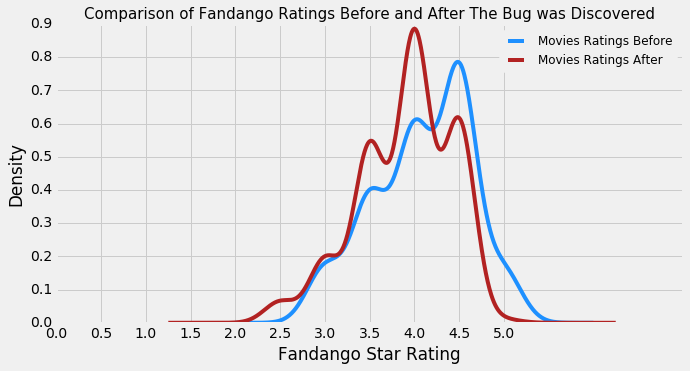

In [267]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(10,5))
before_filtered['Fandango_Stars'].plot.kde(label='Movies Ratings Before', color='dodgerblue')
after_filtered['fandango'].plot.kde(label='Movies Ratings After', color='firebrick')
plt.legend(prop={'size': 12})
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Fandango Star Rating')
plt.ylabel('Density')
plt.title('Comparison of Fandango Ratings Before and After The Bug was Discovered', size=15)
plt.show()

We can see that there definitely was a shift after 2015 in the ratings. This is an indication that Fandango may have indeed corrected the bug, but more research is still needed.

The original ratings appear to be skewed left, whereas the newer ratings are closer to a normal distribution. I will look at a frequency table to see the percentage of movies that received high star ratings on Fandango:

In [268]:
ratings_df=pd.concat([round(before_filtered['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False)*100, 1), round(after_filtered['fandango'].value_counts(normalize=True).sort_index(ascending=False)*100, 1)], axis=1).fillna(0)
ratings_df.rename(columns={'Fandango_Stars': 'Before', 'fandango': 'After'}, inplace=True)
ratings_df['Before']=ratings_df['Before'].apply(lambda x: str(x)+'%')
ratings_df['After']=ratings_df['After'].apply(lambda x: str(x)+'%')
ratings_df.index=ratings_df.index.map(lambda x: str(x)+ ' Stars')
ratings_df.iloc[::-1]

,Before,After
5.0 Stars,7.5%,0.5%
4.5 Stars,37.7%,26.6%
4.0 Stars,28.1%,38.3%
3.5 Stars,18.5%,23.4%
3.0 Stars,8.2%,8.4%
2.5 Stars,0.0%,2.8%


Looking at this table we can see that before the bug was discovered, a higher percentage of movies had 4.5 stars or 5 stars. 

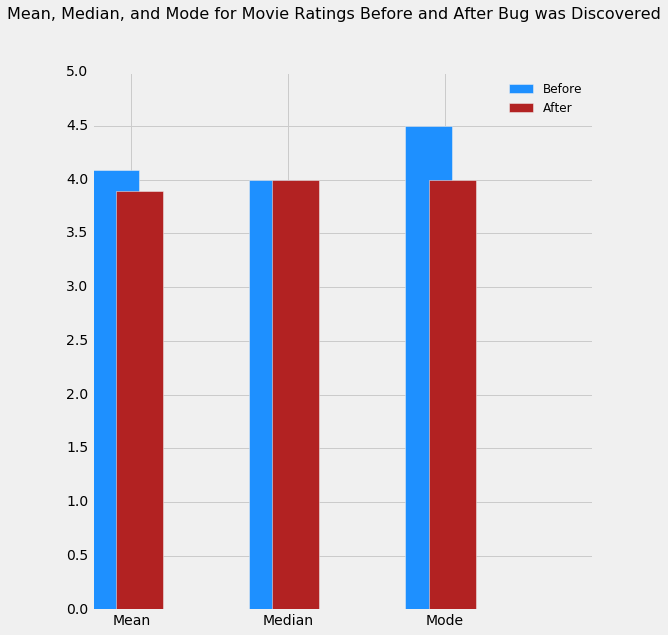

In [270]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(8,9))


labels=[0, 1, 2]



plt.bar([0, 1, 2], [before_filtered['Fandango_Stars'].mean(), 
            before_filtered['Fandango_Stars'].median(),  
            before_filtered['Fandango_Stars'].mode()[0]], width=0.3, color='dodgerblue', label='Before')

plt.bar([0.15, 1.15, 2.15], [after_filtered['fandango'].mean(), 
            after_filtered['fandango'].median(),  
            after_filtered['fandango'].mode()[0]], width=0.3, color='firebrick', label='After')

plt.xticks([0.25, 1.25, 2.25, 3.2], ['Mean', 'Median', 'Mode', ''])
plt.yticks(np.arange(0, 5.5, 0.5))

plt.suptitle('Mean, Median, and Mode for Movie Ratings Before and After Bug was Discovered', size=16, y=1);      
#plt.title('Mean, Median, and Mode for Movie Ratings Before and After Bug was Discovered', pad=10)
plt.legend(prop={'size': 12});

For my final step, I will check to see if there is a statistically significant difference between the movie ratings before and after.

In [272]:
ttest_ind(before_filtered['Fandango_Stars'], after_filtered['fandango'])

Ttest_indResult(statistic=3.43610498925189, pvalue=0.000659471285461223)

## Findings

In conclusion, there is a statistically significant difference between the ratings in the datasets based on the fact that the p-value is less than 0.05. Our p-value of 0.0006 means there is just a 0.06% chance the samples came from a population with equal mean. The bar chart and kde plots also support the conclusion that there is a difference in the ratings after Hickey discovered the bug in Fandango's system. Although it cannot be known for sure whether Fandango fixed the bug, the data used for this analysis indicates it is likely that they did.